# Smooooooothing

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffeqzoo import backend, ivps
from jax.config import config

from odefilter import ivpsolve, recipes

config.update("jax_enable_x64", True)
backend.select("jax")

In [2]:
f, u0, (t0, t1), f_args = ivps.lotka_volterra(time_span=(0.0, 10.0))


@jax.jit
def vf(t, *ys):
    return f(*ys, *f_args)

In [3]:
ek0, info_op = recipes.dynamic_isotropic_eks0(num_derivatives=3)

In [4]:
ek0sol = ivpsolve.solve(
    vf, initial_values=(u0,), t0=t0, t1=t1, solver=ek0, info_op=info_op
)

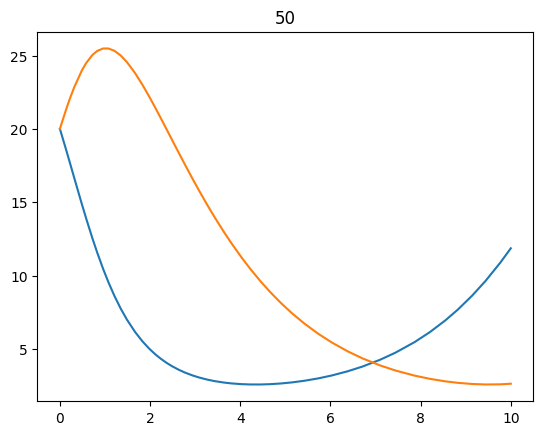

In [5]:
plt.title(len(ek0sol.t))
plt.plot(ek0sol.t, ek0sol.u)
plt.show()

In [6]:
fixpt_ek0, info_op = recipes.dynamic_isotropic_fixpt_eks0(num_derivatives=3)

In [7]:
fixptsol = ivpsolve.simulate_checkpoints(
    vf,
    initial_values=(u0,),
    ts=ek0sol.t,
    solver=fixpt_ek0,
    info_op=info_op,
)

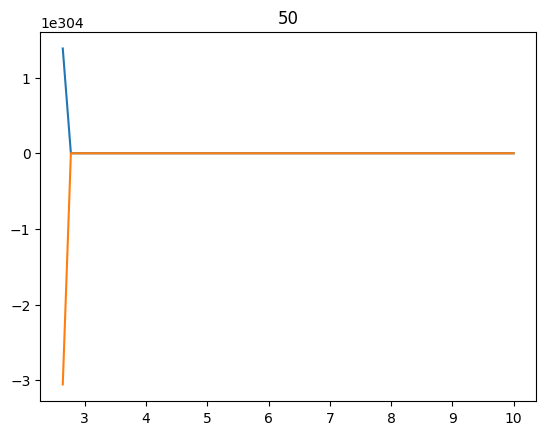

In [8]:
plt.title(len(fixptsol.t))
plt.plot(fixptsol.t, fixptsol.u)
plt.show()